In [8]:
import pandas as pd
from PIL import Image
import io
import json
import matplotlib.pyplot as plt
import re
import tensorflow as tf

In [9]:
parquet_file = [
    'data/train-00000-of-00004-b4aaeceff1d90ecb.parquet',
    'data/train-00001-of-00004-7dbbe248962764c5.parquet',
    'data/train-00002-of-00004-688fe1305a55e5cc.parquet',
    'data/train-00003-of-00004-2d0cd200555ed7fd.parquet'
    ]

df = pd.concat([pd.read_parquet(f) for f in parquet_file])

df_test = pd.read_parquet('data/test-00000-of-00001-9c204eb3f4e11791.parquet')

ArrowMemoryError: realloc of size 898154496 failed

In [ ]:
len(df)

800

In [ ]:
df.head()

,image,ground_truth
0,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"{""gt_parse"": {""menu"": [{""nm"": ""Nasi Campur Bal..."
1,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"{""gt_parse"": {""menu"": [{""nm"": ""SPGTHY BOLOGNAS..."
2,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"{""gt_parse"": {""menu"": [{""nm"": ""HAKAU UDANG"", ""..."
3,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"{""gt_parse"": {""menu"": [{""nm"": ""Bintang Bremer""..."
4,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"{""gt_parse"": {""menu"": {""nm"": ""BASO BIHUN"", ""un..."


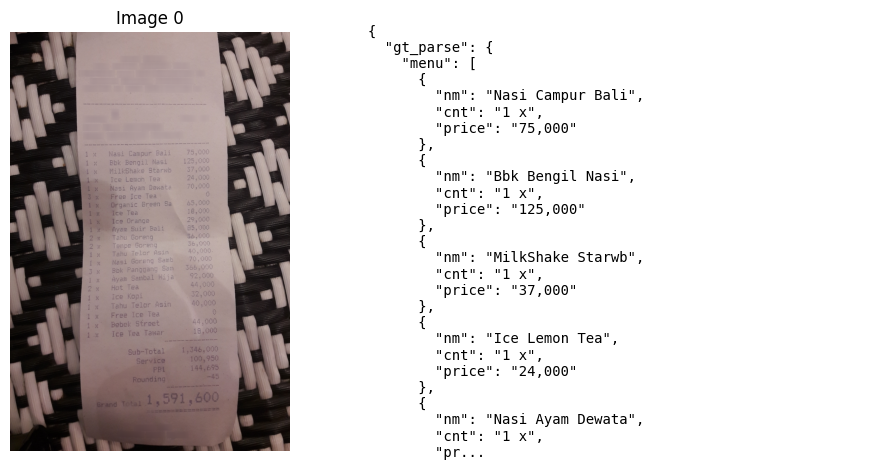

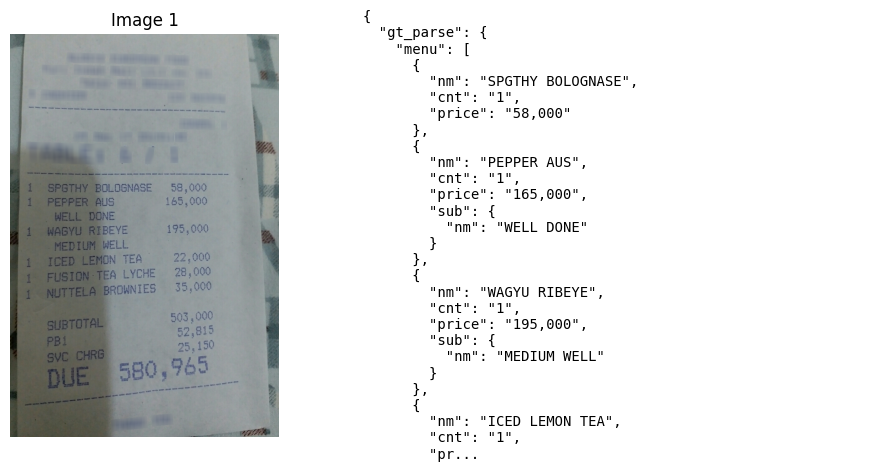

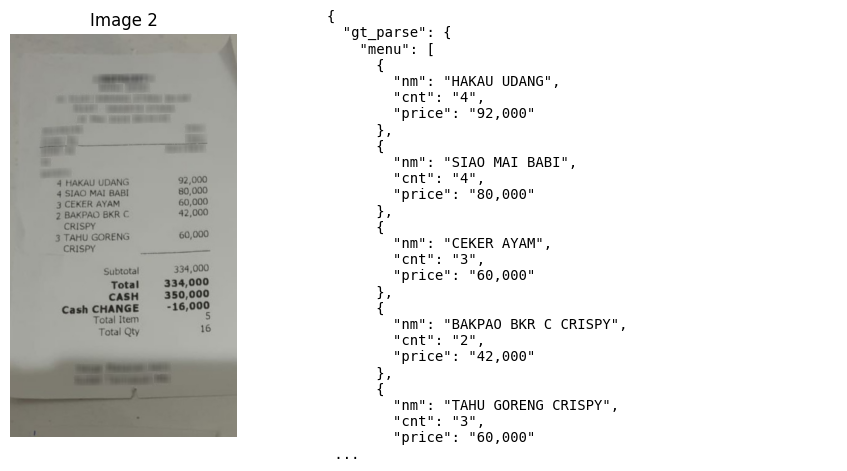

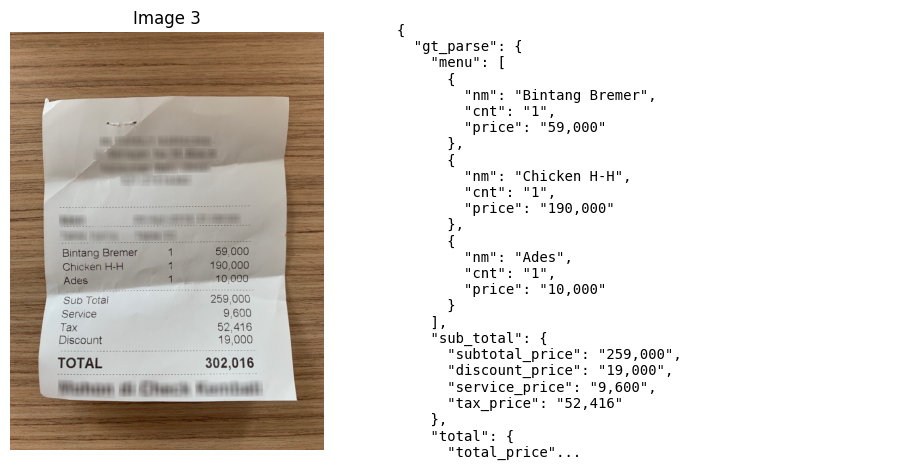

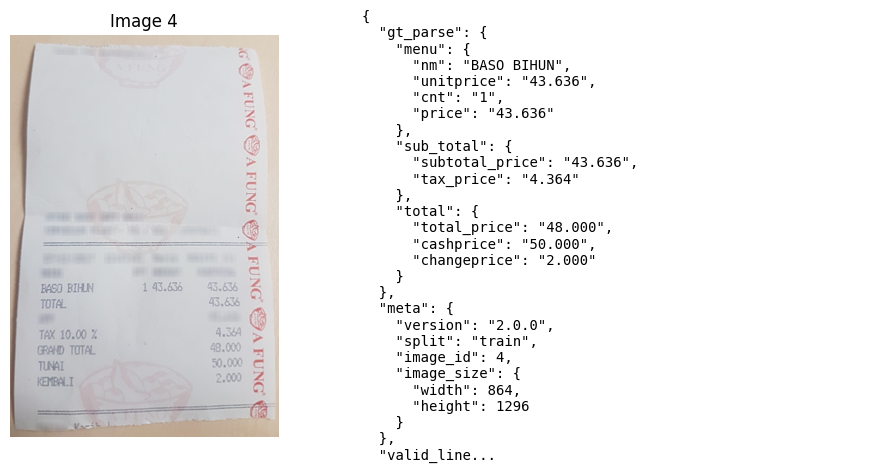

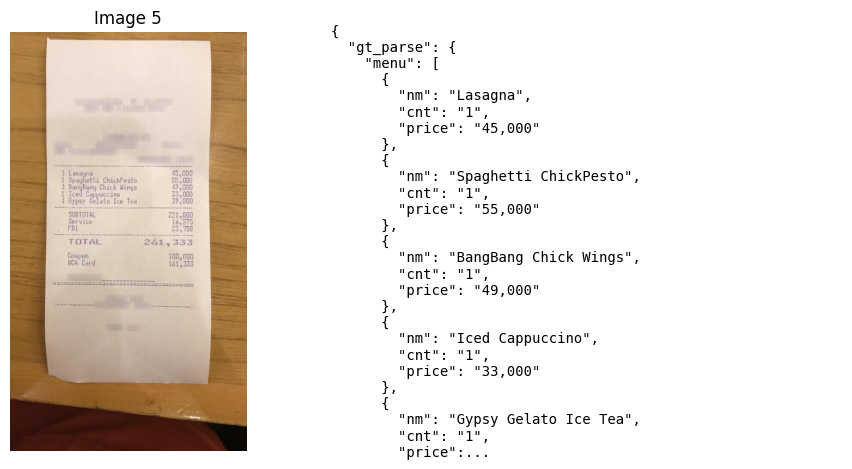

Full ground truth for image 5:
{
  "gt_parse": {
    "menu": [
      {
        "nm": "Lasagna",
        "cnt": "1",
        "price": "45,000"
      },
      {
        "nm": "Spaghetti ChickPesto",
        "cnt": "1",
        "price": "55,000"
      },
      {
        "nm": "BangBang Chick Wings",
        "cnt": "1",
        "price": "49,000"
      },
      {
        "nm": "Iced Cappuccino",
        "cnt": "1",
        "price": "33,000"
      },
      {
        "nm": "Gypsy Gelato Ice Tea",
        "cnt": "1",
        "price": "39,000"
      }
    ],
    "sub_total": {
      "subtotal_price": "221,000",
      "service_price": "16,575",
      "tax_price": "23,758"
    },
    "total": {
      "total_price": "261,333",
      "total_etc": "100,000",
      "creditcardprice": "161,333"
    }
  },
  "meta": {
    "version": "2.0.0",
    "split": "train",
    "image_id": 5,
    "image_size": {
      "width": 2304,
      "height": 4096
    }
  },
  "valid_line": [
    {
      "words": [
        

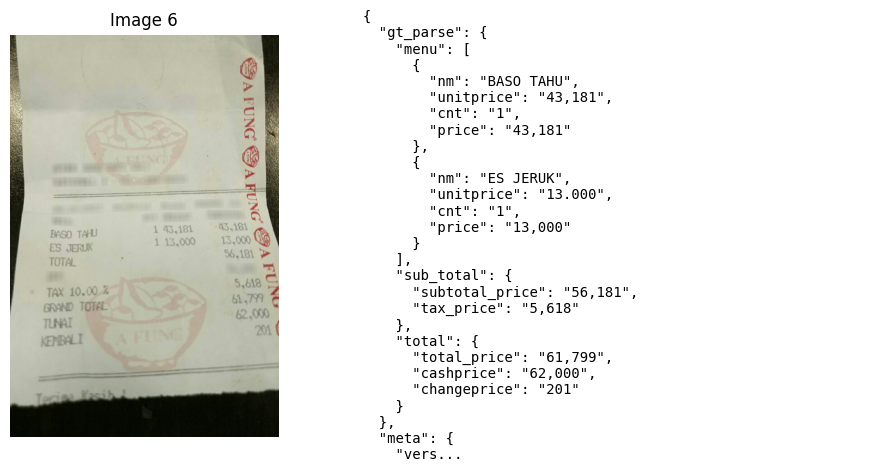

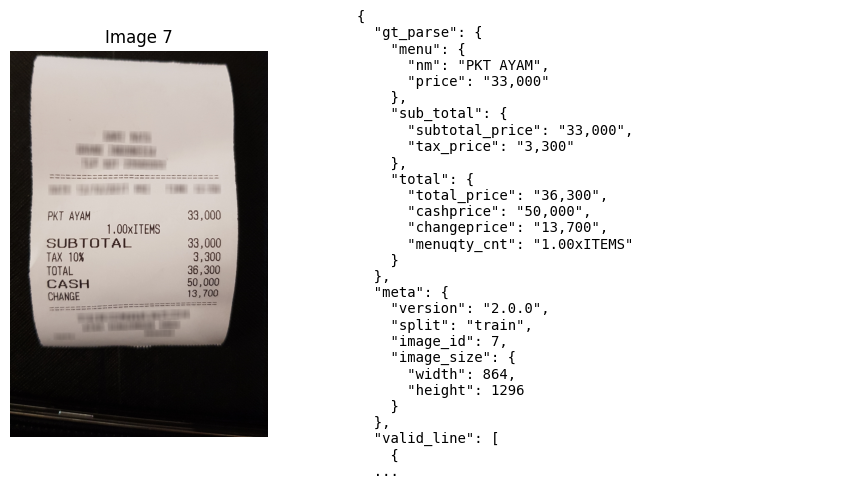

In [ ]:
for index, row in df.head(8).iterrows():
    image_data = row['image']
    image = Image.open(io.BytesIO(image_data['bytes']))
    
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display the image on the left side
    ax[0].imshow(image)
    ax[0].set_title(f"Image {index}")
    ax[0].axis('off')
    
    # Parse the ground truth JSON string to a Python object
    ground_truth = json.loads(row['ground_truth'])  # Parse JSON string to a Python dict
    formatted_gt = json.dumps(ground_truth, indent=2)  # Convert dict to pretty JSON string
    
    # Display the JSON-formatted ground truth on the right side
    truncated_gt = (formatted_gt[:500] + '...') if len(formatted_gt) > 500 else formatted_gt
    ax[1].text(0, 0.5, truncated_gt, wrap=True, fontsize=10, verticalalignment='center', 
               family='monospace', transform=ax[1].transAxes)  # Use monospace font for JSON
    ax[1].axis('off')
    
    plt.tight_layout()
    plt.show()

    if index == 5:  # Change this to any other index if needed
        print(f"Full ground truth for image {index}:\n{formatted_gt}\n")

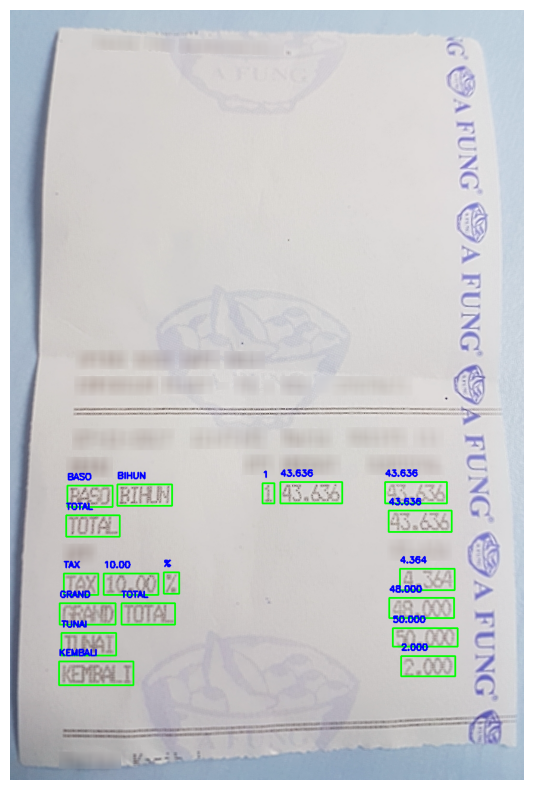

In [ ]:
import json
import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def display_image_with_labels(image_data, label_data, box_color=(0, 255, 0), text_color=(255, 0, 0), thickness=2, font_scale=0.5):
    """
    Menampilkan gambar dengan bounding box dan label teks menggunakan Matplotlib.
    
    Parameters:
    - image_data (dict): Data gambar dalam format bytes.
    - label_data (dict): Data label dalam format dictionary, berisi koordinat bounding box dan teks.
    - box_color (tuple): Warna bounding box (BGR).
    - text_color (tuple): Warna teks (BGR).
    - thickness (int): Ketebalan garis bounding box.
    - font_scale (float): Skala ukuran font untuk teks label.
    """
    
    # Load image and convert to OpenCV format
    image = image_data
    # image = Image.open(io.BytesIO(image_data['bytes']))
    # image = np.array(image)  # Convert PIL image to NumPy array
    
    # Set font for text
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # Parse valid_line dan buat bounding box
    for line in label_data:
        for word in line['words']:
            quad = word['quad']
            
            # Define bounding box from the quad
            top_left = (quad['x1'], quad['y1'])
            bottom_right = (quad['x3'], quad['y3'])
            
            # Draw bounding box
            cv2.rectangle(image, top_left, bottom_right, box_color, thickness)
            
            # Write text label near the box
            text = word['text']
            cv2.putText(image, text, (quad['x1'], quad['y1'] - 10), font, font_scale, text_color, thickness)
    
    # Convert BGR to RGB for displaying in matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image with bounding boxes using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes for a cleaner look
    plt.show()

# Contoh penggunaan
index = 4
ground_truth = json.loads(df.iloc[index]['ground_truth'])  # Parse JSON string to a Python dict
image_data = df.iloc[index]['image']
image = Image.open(io.BytesIO(image_data['bytes']))
image_data = np.array(image)  
display_image_with_labels(image_data, ground_truth['valid_line'])


In [ ]:
def get_dimensions(image_data):
    image = Image.open(io.BytesIO(image_data['bytes']))
    return image.size

In [ ]:
df['image_dimensions'] = df['image'].apply(get_dimensions)

print(df[['image', 'image_dimensions']])

                                                 image image_dimensions
0    {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      (864, 1296)
1    {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      (864, 1296)
2    {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      (720, 1280)
3    {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...     (1108, 1478)
4    {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      (864, 1296)
..                                                 ...              ...
195  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...     (2304, 4096)
196  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      (864, 1296)
197  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...       (576, 864)
198  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      (864, 1296)
199  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...     (1551, 2701)

[800 rows x 2 columns]


In [ ]:
ground_truth['valid_line']

[{'words': [{'quad': {'x1': 133,
     'y1': 800,
     'x2': 209,
     'y2': 800,
     'x3': 209,
     'y3': 836,
     'x4': 133,
     'y4': 836},
    'is_key': 0,
    'row_id': 2119099,
    'text': 'BASO'},
   {'quad': {'x1': 217,
     'y1': 798,
     'x2': 309,
     'y2': 798,
     'x3': 309,
     'y3': 834,
     'x4': 217,
     'y4': 834},
    'is_key': 0,
    'row_id': 2119099,
    'text': 'BIHUN'}],
  'category': 'menu.nm',
  'group_id': 3,
  'sub_group_id': 0},
 {'words': [{'quad': {'x1': 461,
     'y1': 796,
     'x2': 481,
     'y2': 796,
     'x3': 481,
     'y3': 830,
     'x4': 461,
     'y4': 830},
    'is_key': 0,
    'row_id': 2119099,
    'text': '1'}],
  'category': 'menu.cnt',
  'group_id': 3,
  'sub_group_id': 0},
 {'words': [{'quad': {'x1': 491,
     'y1': 794,
     'x2': 595,
     'y2': 794,
     'x3': 595,
     'y3': 830,
     'x4': 491,
     'y4': 830},
    'is_key': 0,
    'row_id': 2119099,
    'text': '43.636'}],
  'category': 'menu.unitprice',
  'group_id': 3,


run untuk mendapatkan image_test

In [ ]:
# import os
# import io
# from PIL import Image

# # Ganti dengan path folder tujuan
# output_folder = "output_images_test"

# # Pastikan folder tujuan ada
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# # Loop untuk menyimpan gambar
# for index, row in df_test.iterrows():
#     image_data = row['image']  # Ambil data gambar
#     image = Image.open(io.BytesIO(image_data['bytes']))  # Buka gambar dari byte array
    
#     # Tentukan nama file untuk gambar
#     file_name = f"image_{index}.png"  # Anda bisa mengganti format file sesuai kebutuhan
#     file_path = os.path.join(output_folder, file_name)  # Gabungkan folder dengan nama file
    
#     # Simpan gambar ke folder
#     image.save(file_path)
#     print(f"Gambar disimpan ke {file_path}")

Gambar disimpan ke output_images\image_0.png
Gambar disimpan ke output_images\image_1.png
Gambar disimpan ke output_images\image_2.png
Gambar disimpan ke output_images\image_3.png
Gambar disimpan ke output_images\image_4.png
Gambar disimpan ke output_images\image_5.png
Gambar disimpan ke output_images\image_6.png
Gambar disimpan ke output_images\image_7.png
Gambar disimpan ke output_images\image_8.png
Gambar disimpan ke output_images\image_9.png
Gambar disimpan ke output_images\image_10.png
Gambar disimpan ke output_images\image_11.png
Gambar disimpan ke output_images\image_12.png
Gambar disimpan ke output_images\image_13.png
Gambar disimpan ke output_images\image_14.png
Gambar disimpan ke output_images\image_15.png
Gambar disimpan ke output_images\image_16.png
Gambar disimpan ke output_images\image_17.png
Gambar disimpan ke output_images\image_18.png
Gambar disimpan ke output_images\image_19.png
Gambar disimpan ke output_images\image_20.png
Gambar disimpan ke output_images\image_21.pn